In [1]:
##imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

/home/sergio/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [62]:
df = pd.read_csv('../results.csv')
df.shape

(45773, 19)

In [63]:
#features and target selection
features = ['date','starting_ct', 'rank_1', 'rank_2']
target = ['map_winner']
X = df[features]
y = df[target]

In [64]:
#label encoder
#to go back: le.insverse_transform()
le = preprocessing.LabelEncoder()

X.loc[:, 'date'] = le.fit_transform(X['date'])
X.head()

/home/sergio/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,date,starting_ct,rank_1,rank_2
0,1541,2,62,63
1,1541,2,62,63
2,1541,1,140,118
3,1541,2,61,38
4,1541,2,61,38


In [74]:
#splitting dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

tree = DecisionTreeClassifier(max_depth = 7, random_state=0)

In [75]:
tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [76]:
print('Train score: {:.3f}'.format(tree.score(X_train, y_train)))
print('Test score: {:.3f}'.format(tree.score(X_test, y_test)))

Train score: 0.637
Test score: 0.624


In [77]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="tree.dot", class_names=["Team_1 Wins", "Team_2 Wins"],
               feature_names = X.columns.values, impurity=False, filled=True)

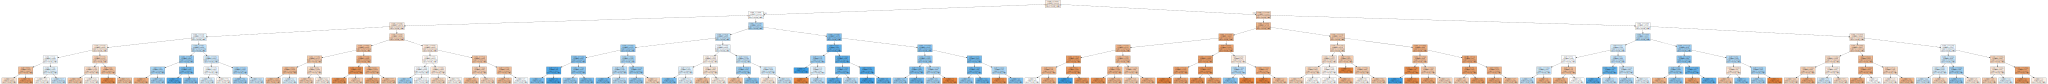

In [78]:
import graphviz

with open("tree.dot") as f:
    dot_graph = f.read()
    
graphviz.Source(dot_graph)

Features importance: 
[0.06145942 0.00089113 0.54099858 0.39665087]


Text(0, 0.5, 'Feature')

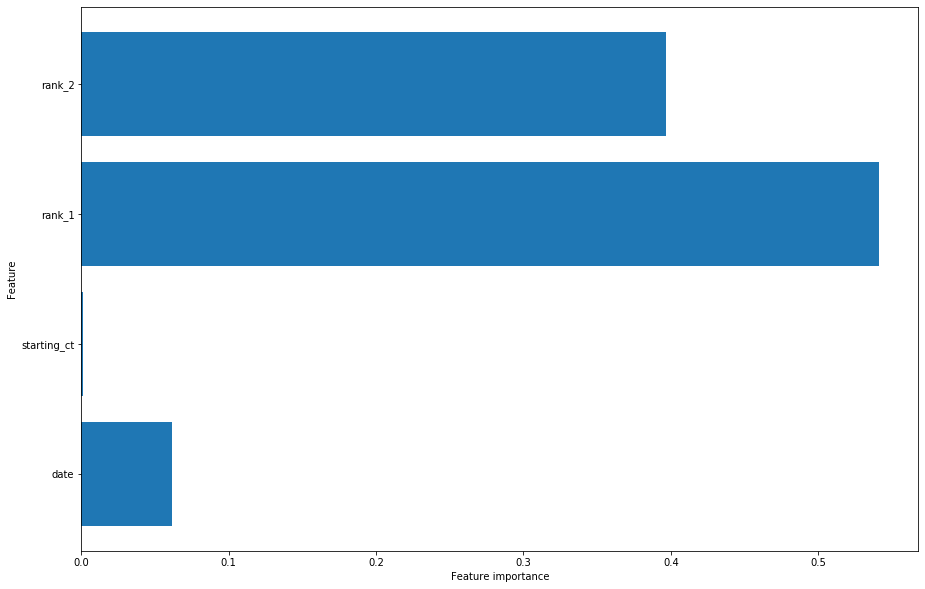

In [79]:
print('Features importance: \n{}'.format(tree.feature_importances_))

n_features = len(features)
plt.figure(figsize=(15, 10))
plt.barh(range(n_features), tree.feature_importances_, align='center')
plt.yticks(np.arange(n_features), features)
plt.xlabel("Feature importance")
plt.ylabel("Feature")